### Learning Neural Network by implementation

The best way to learn something in a way that sticks is to really do it.

- Author - Alex Punnen
- alexcpn@gmail.com




**Objectives**

### Section 1

1.  Build out a simple two layered network using plain python and numpy.
2.  Derive out the backpropagation throratically and learn it via implement the same equations in the neural net
    - Note: The only leap of faith is to translate these equations from Scalar Calculus to Matrix Calculus. The derivation of Matrix Calculs parts are also linked in
3. Understand the importance of Non linear activation function.

#### Section 2

4. Expand this to a three layer Network.
5. Derive and Implement backpropagation for inner layers


#### Section 3

5. Neural Network as  Universal function approximaters, modify network and train it to Approximate the Sine function.
6. Debug why the network is not learning effectively
7. Fine Tune learning rates, batch sizes, Input Standerdization for better learning.
8. Add L2 Regularisation
9. Understand about weight initalization -Xavier Glorot Initialization


We will  simulate other problems like Exploding/Vanishing gradients and Layer Normalization

**References**

All the derivations are from my previous blogs https://alexcpn.github.io/html/NN/ml/

I have used ChatGPT 4 also to generate answers and also to debug and check code snippets.

The intial Neural Network is taken from here   http://iamtrask.github.io/2015/07/12/basic-python-network/



### Below is the sort of first simple Neural Network that we will build

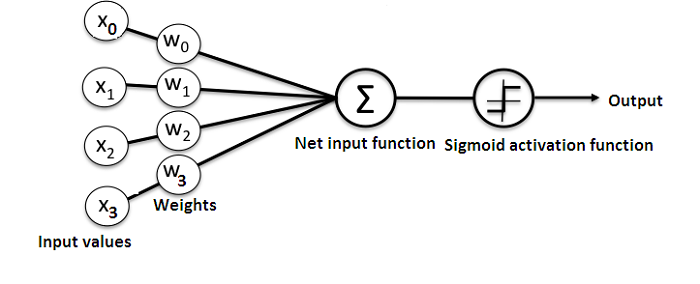

In [ ]:
# These are the only two imports tou need
import numpy as np # for arrays and array=matrix multiplicaion and other utilites
import matplotlib.pyplot as plt # for plotting graphs

In [ ]:
# Lets define the Training data set and the Target for the toy example
# This x defines our Input; or in Neural Network terms, the training set

x = np.array(
    [
        [0,0,1],
        [0,1,1],
        [1,0,1],
        [1,1,1]
    ])
# and  y is the desired ouput
# Basically the first row in y represents the  exected ouput for the first row of the training set.
# The second row represents the expected output for the second row of the training set etc. We have only four row's of training data for out toy demonstartion

# Let us define the expected output
# The output becomes 1 only when two of the inputs are one; Or that is the model that we need the Neural Network to Learn
# [0,0,1] -> [0], [0,1,1]-> [1] etc

y = np.array(
  [
      [0],
      [1],
      [1],
      [0]
  ])
print(x.shape)
print(y.shape)

(4, 3)
(4, 1)


Now we need to define the weights of the layers of our neural network.
Note that the input is of shape $4*3$. So the first layer should be of shape that we can take dot product of.
Let us use $3*4$. The shape of the dot product woud be $4*4$ and the next layer weight should be comptaible with it. Let's take the next layer weights as size $4*1$.

In [ ]:
#---------------------------------------------------------------
# Boiler plate code for calculating Sigmoid, derivative etc
#---------------------------------------------------------------

# seed random numbers to make calculation deterministic
np.random.seed(1)

# pretty print numpy array
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

# let us code our sigmoid funciton  This is the non linearity
def sigmoid(x):
    return 1/(1+np.exp(-x))

# let us add a method that takes the derivative of x as well
def derv_sigmoid(x):
   return sigmoid(x)*(1-sigmoid(x))



#### The need for Non- Linearity
Why is this called a non-linearity; This is because the Output is squeezed between 0 and 1 unlike a Linear Function say of the form $f(x)=ax+b $ where the output increases propotionally.

Here is a short check

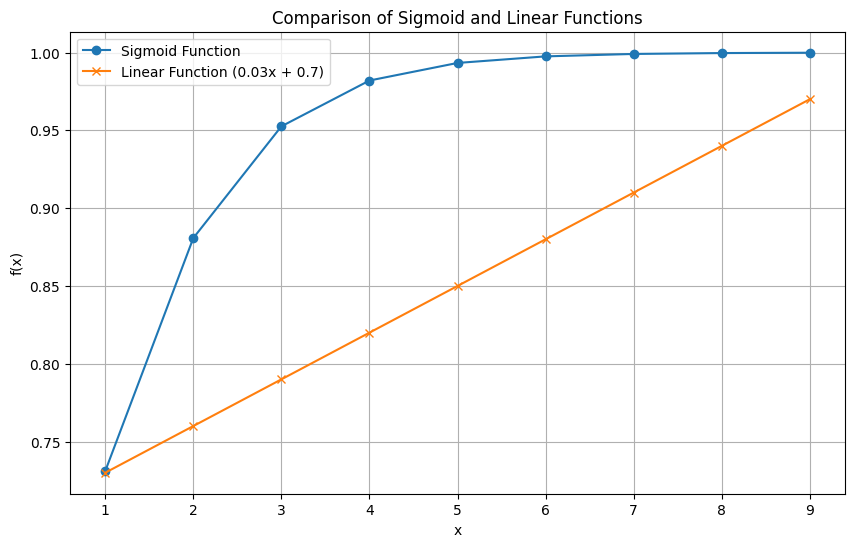

In [ ]:
sigmoid_values=[]
for i in range(1,10):
  sigmoid_values.append(sigmoid(i))

#and a linear function example

def linear_function(x):
    return 0.03*x + 0.7
linear_values=[]
for i in range(1,10):
  linear_values.append(linear_function(i))

# Prepare data for plotting
x_values = list(range(1,10))
sigmoid_y_values = sigmoid_values
linear_y_values = linear_values

# Plotting both the sigmoid and linear functions
plt.figure(figsize=(10, 6))
plt.plot(x_values, sigmoid_y_values, label='Sigmoid Function', marker='o')
plt.plot(x_values, linear_y_values, label='Linear Function (0.03x + 0.7)', marker='x')
plt.title('Comparison of Sigmoid and Linear Functions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

**Why is Non linearity so important ?**

- Enables Complex Function Approximation: Non-linear activation functions allow neural networks to approximate virtually any complex function, a foundational aspect of universal approximation theory. This capability is crucial because real-world data often exhibit non-linear relationships, and capturing these nuances is essential for making accurate predictions or decisions.

- Facilitates Deep Learning Architectures: Without non-linearities, deep neural networks would not be able to realize their potential. A network composed of linear layers, regardless of its depth, could be simplified to a single linear transformation, which severely limits its computational power. Non-linear activation functions between layers ensure that the network can create complex mappings from inputs to outputs, enabling the depth of the network to contribute to its learning capacity.

**Illustrate by Example - A network composed of linear layers, regardless of its depth, could be simplified to a single linear transformation**


Let's illustrate why a network composed of linear layers can be simplified to a single linear transformation with a simple example. Consider a neural network that has multiple linear layers stacked together, without any non-linear activation functions in between.

Suppose we have a 3-layer neural network where each layer performs a linear transformation defined as follows:

- The first layer applies a transformation $f_1(x) = a_1x + b_1,$
- The second layer applies  $f_2(x) = a_2x + b_2$,
- The third layer applies $f_3(x) = a_3x + b_3$.

The output of the entire network, when given an input $(x$, is the composition of these three functions: $f_3(f_2(f_1(x)))$.

Let's compute this step by step to see how it simplifies to a single linear transformation.

1. After the first layer: $y_1 = a_1x + b_1$.
2. Inputting $y_1$ into the second layer: $y_2 = a_2(a_1x + b_1) + b_2 = a_2a_1x + a_2b_1 + b_2$.
3. Inputting $y_2$ into the third layer results in: $y_3 = a_3(a_2a_1x + a_2b_1 + b_2) + b_3 = a_3a_2a_1x + a_3a_2b_1 + a_3b_2 + b_3$.

This final expression, $y_3 = a_3a_2a_1x + a_3a_2b_1 + a_3b_2 + b_3$, is still a linear equation in terms of $x$, **with the entire network's effect being captured by a single linear transformation of the form $y = ax + b$, where $a = a_3a_2a_1$ and $b = a_3a_2b_1 + a_3b_2 + b_3$.**


This simplification shows that stacking multiple linear layers, without introducing non-linearities, does not increase the model's representational power beyond that of a single linear layer. The network remains incapable of modeling complex patterns that are not linearly separable or that require capturing non-linear relationships. This is a key reason why non-linear activation functions are essential in neural network design, enabling the network to learn and model complex, non-linear mappings between inputs and outputs.

*Credits ChatGPT4*

In [ ]:
np.random.seed(1)

# randomly initialize our weights. Weights are the Neurons of the Neural Network
# The whole point is in learning the values of weights from a random point to be able to model the input function

weight1 = np.random.random((3,4))
weight2 = np.random.random((4,1))



 ### Modeling and a very simple two layered Neural Network.
 The network is taken form  http://iamtrask.github.io/2015/07/12/basic-python-network/


#### The forward pass

$$
x \rightarrow a^{l-1} \rightarrow  a^{l} \rightarrow  y
$$

We can write $a^l$ as

$$
a^{l} = \sigma(z^l) \quad where \quad
z^l =w^l a^{l-1} +b^l
$$

So forward pass is (Weight Matrix * Input) the result of which is fed into a non-linear function like Sigmoid to give an Output.

Input of each layer is the output of the *non linearity* from the previous layer.

Note $x$  can also be written as  $a^0$

Usually a softmax is applied to the last layers output to fit the weights of the last layer between 0 and 1, for classification for multi-class selection. For this toy example this is not needed

Also there are LayerNoramlisation added between layers in actual netwroks which is also not shown here

## The Backward pass - or back propagation

This is where the magic of Neural Network happens and this magic potion is same irrespective of the depth and complexity of the Neural Network.

- A bit about Back Propagation
  
  In the context of Neural Network it was this [1986 Article in Nature magazine](https://www.cs.utoronto.ca/~hinton/absps/naturebp.pdf) that defined it in the terms we know of today. This was by David E. Rumelhart, Geoffrey E. Hinton, and Ronald J. Williams.
  This paper also refers to Yann Le Cun's paper - [Learning Process in an Asymmetric Threshold Network of 1986](https://link.springer.com/chapter/10.1007/978-3-642-82657-3_24) which speaks of Gradient Descent.

  The derivation of the errors with respect to inner and outer layer as described in the paper is almost exactly how we apply it here below.

  However before that, in modelling certain problems it was Paul J Webros who suggested using derivatives to fit a non linear equation/model - (Solow Economic forecasting model) in his PhD Theisis - [Beyond Regression -New Tools for Prediction and Analysis in Behaviour Sciences 1974](https://www.researchgate.net/publication/35657389_Beyond_regression_new_tools_for_prediction_and_analysis_in_the_behavioral_sciences). Tracing back is futile but some interesting deatils are here in [this book review](https://academic.oup.com/comjnl/article-pdf/37/8/723/1116753/370723.pdf) of "The Roots of Backpropagation- Paul J Webros"

- What is the main idea of Back Propagation ?

 It is basically trying to find how to adjust weights for all the layers so that the weight in all the layers, especially the inner layers arrive at a point where the input applied to the weights give the desired output.

 Taking back a step - basically how to learn the weights so that the neural net can model any complex function

 Please refer to https://alexcpn.github.io/html/NN/ml/5_backpropogation_scalar_calculus/

### **How to calculate Gradient Vector of Loss function In Output Layer**

  If we model our Neural Network like a Graph,the below  is a representation of a single path in the last layer(l) of a neural network; and it shows how the connection from previous layer - that is the activation of the previous layer and the weight of the current layer is affecting the output; and thereby the final Cost.

  The central idea is how a small change in weight affects the final Cost in this chain depiction.

  [![image.png](https://i.postimg.cc/L5H6NMJq/image.png)](https://postimg.cc/k6pmgzF9)

  For the last layer shown in code below as dC_dw2

  $$
  \mathbf {
  \frac {\partial C}{\partial w^2} = \frac {\partial z^2}{\partial w^2} . \frac {\partial a^2}{\partial z^2} . \frac {\partial C}{\partial a^2}
  }
  $$
  The first term is
  $$
  \mathbb{
  \frac{\partial z^{2} }{\partial w^2} = \frac{\partial (a^1.w^2)}{\partial w^2} =a^1 \quad \rightarrow  (\mathbf  {1.1})
  }
  $$

  The second term is

  $$
  \mathbb{
  \frac{\partial a^{2} }{\partial z^2} = \frac{\partial \sigma(z^2) }{\partial z^2} =\sigma' (z^{2}) \quad \rightarrow  (\mathbf  {1.2})
  }
  $$

  The third term is the derivative of the loss. Note here that we are using Mean Square Error Loss ( that is (output -expected) squared so that positve and negative are treated same).
  
  $$
  \mathbf{
  \frac{\partial C}{\partial(a^2)} = \frac {\partial({\frac{1}{2} \|y-a^2\|^2)}}{\partial(a^2)} = \frac{1}{2}*2*(a^2-y) =(a^2-y) \rightarrow (1.3) }
  $$

  Note that the division by 2 is for mathematical convenience during optimization. The complete loss over a dataset would typically involve summing this term over all samples and dividing by the number of samples.

  Putting it all together

  $$
  \mathbf{
  \frac {\partial C}{\partial w^2} =  a^1* \sigma' (z^{2})*\frac{\partial C}{\partial(a^2)}  \quad \rightarrow (A_2l) }
  $$
```
  # Backward Pass - Backpropagation
  delta2  = (a2-y)
  #---------------------------------------------------------------
  # Calcluating change of Cost/Loss wrto weight of Last layer
  # Eq (A) ---> dC_dw2
  #---------------------------------------------------------------

  dC_dw2_1  = delta2*derv_sigmoid(z2)
  dC_dw2  = a1.T.dot(dC_dw2_1)
```
### **How to calculate Gradient Vector of Loss function In Inner Layer**

Let's do similar to above; the key is in using the calculations of above part in this layer and similarly for other layers

$$
\frac {\partial C}{\partial w^1}= \frac {\partial z^1}{\partial w^1}. \frac {\partial a^1}{\partial z^1}. \frac {\partial C}{\partial a^1}
$$

The first term is similar to (1.1)
$$
\mathbb{
\frac{\partial z^{1} }{\partial w^1} = \frac{\partial a^0.w^1}{\partial w^1} =a^0 \quad \rightarrow  (\mathbf  {2.1})
}
$$
The second term is also similar to (1.2)
$$
\mathbb{
\frac{\partial a^{1} }{\partial z^1} = \frac{\partial \sigma(z^1) }{\partial z^1} =\sigma' (z^{1}) \quad \rightarrow  (\mathbf  {2.2})
}
$$
For the third part, we use Chain Rule to split like below, the first part of which we calculated in the earlier step.
$$
\frac{\partial C}{\partial(a^1)} =  \frac{\partial C}{\partial(a^2)}.\frac{\partial(a^2)}{\partial(a^1)}
$$
First term from (1.3)
  $$
  \mathbf{
  \frac{\partial C}{\partial(a^2)} = (a^2-y) \rightarrow (2.3.1) }
  $$
The second term can be re-written as

$$
\begin{aligned}
 \frac{\partial(a^2)}{\partial(a^1)} =  \frac{\partial(a^2)}{\partial(z^2)}. \frac{\partial(z2)}{\partial(a^1)}   \\ \\
 Note \space that \space a^2 = \color{red}{\sigma}(z^2), and \space above \space becomes
 \\ \\
  \frac{\partial \sigma (z^2)}{\partial(z^2)} .\frac{\partial(w^2.a^1)}{\partial(a^1)} \\ \\
 which \space is \space \\ \\
 \sigma'(z^2).w^2 \\ \\
\frac{\partial(a^2)}{\partial(a^1)} = \sigma'(z^2).w^2  \quad \rightarrow (2.3.2)\\ \\
\end{aligned}
$$

Putting all together we get

$$
\mathbf{
\frac {\partial C}{\partial w^1} =a^0* \sigma'(z^1)*(a^2-y).\sigma'(z^2).w^2
\quad \rightarrow \mathbb (B)
\\  
which \space is \space same \space as \\
\\
\frac {\partial C}{\partial w^1} =a^0* \sigma'(z^1)* \frac{\partial C}{\partial(a^2)} .\sigma'(z^2).w^2
}
$$

This is what is shown in the code snippet below

```
# note  dC_dw2_1  = dC_da2*derv_sigmoid(z2)
dC_dw1 =  np.multiply(dC_dw2_1,weight2.T) * derv_sigmoid(z1)
dC_dw1 = a0.T.dot(dC_dw1)

for a moment if we forget vector calculus and transpises the above equation spread out matched the equation (B)

dC_dw1 = a0*derv_sigmoid(z1)*dC_da2*derv_sigmoid(z2)*weight2

```
which is basically the re-write of the above using previous computed terms




In [ ]:
# set learning rate as 1 for this toy example
learningRate = 1


# Randomly initalised weights
weight1 =  np.random.random((3,4))
weight2 =  np.random.random((4,1))

# Activation to layer 0 is taken as input x
a0 = x

iterations = 10000
for iter in range(0,iterations):

  ## The forward pass
  z1= np.dot(x,weight1)
  a1 = sigmoid(z1)
  z2= np.dot(a1,weight2)
  a2 = sigmoid(z2)
  if iter == 0:
    print("Intial Ouput \n",a2)

  # Backward Pass - Backpropagation
  delta2  = (a2-y)
  #---------------------------------------------------------------
  # Calcluating change of Cost/Loss wrto weight of Last layer
  # Eq (A) ---> dC_dw2
  #---------------------------------------------------------------

  dC_dw2_1  = delta2*derv_sigmoid(z2)
  dC_dw2  = a1.T.dot(dC_dw2_1)

  #---------------------------------------------------------------
  # Calcluating change of Cost/Loss wrto weight of 2nd last layer
  # Eq (B)---> dC_dw1 = derv_sigmoid(z1)*delta2*derv_sigmoid(z2)*weight2*a0.T
  # dC_dw1 = derv_sigmoid(z1)*dC_dw2*weight2_1*a0.T
  #---------------------------------------------------------------

  dC_dw1 =  np.multiply(dC_dw2_1,weight2.T) * derv_sigmoid(z1)
  dC_dw1 = a0.T.dot(dC_dw1)

  #---------------------------------------------------------------
  #Gradinent descent
  #---------------------------------------------------------------

  weight2 = weight2 - learningRate*(dC_dw2)
  weight1 = weight1 - learningRate*(dC_dw1)


print("New ouput\n",a2)

#---------------------------------------------------------------
# Training is done, weight2 and weight2 are primed for output y
#---------------------------------------------------------------


Intial Ouput 
 [[ 0.733]
 [ 0.777]
 [ 0.757]
 [ 0.789]]
New ouput
 [[ 0.011]
 [ 0.988]
 [ 0.993]
 [ 0.010]]


Lets test out, two ones in input and one zero, ouput should be One

In [ ]:
def forward(x):
    x1 = np.array(x)
    z1= np.dot(x1,weight1)
    a1 = sigmoid(z1)
    z2= np.dot(a1,weight2)
    a2 = sigmoid(z2)
    return a2

In [ ]:
print("Ouput after Training is ",forward([[1,0,1]]))
print("Ouput after Training is ",forward([[1,1,1]]))
print("Ouput after Training is ",forward([[1,1,0]]))
print("Ouput after Training is ",forward([[0,0,0]]))

Ouput after Training is  [[ 0.993]]
Ouput after Training is  [[ 0.010]]
Ouput after Training is  [[ 0.003]]
Ouput after Training is  [[ 0.026]]


Note that the input `x1 = np.array([[1,1,0]])` was not in the training set; and the expected output was 1, but this network gave 0; which is wrong. When a network is not able to generalise from its inputs to give the correct output for something is has not been trained on, but for all inputs in its training set it gives the correct output, such a learned/trained network is said to overfit.

This could be due to the shallow network or due to small amount of training data,as is the problem here

## Three layered Neural net

Lets add one more layer to the above Neural Network and see all the equations hold

THe Network will be now where $l=3$, three layer.

$$
a^0 \rightarrow a^{l-2} \rightarrow a^{l-1} \rightarrow  a^{l} \rightarrow  y
$$

and the equation we derived earlier for the last layer of a two layered NN will stand except of the layer indiceds

####  The Equation of the Last  layer also would be similar to previous eq A for a two layered NW

Equation for two layered
  $$
  \mathbf{
  \frac {\partial C}{\partial w^2} =  a^1* \sigma' (z^{2})*\frac{\partial C}{\partial(a^2)}  \quad \rightarrow (A_2l) }
  $$

Modified for three layered

$$
\mathbf{
\frac {\partial C}{\partial w^3} =  a^2* \sigma' (z^{3})*\frac{\partial C}{\partial(a^3)}  \quad \rightarrow (A_3l) }
$$
where
$$
\frac{\partial C}{\partial(a^3)} =(a^3-y)
$$

####  The Equation of the inner layer also would be similar to previous


$$
\frac {\partial C}{\partial w^2}= \frac {\partial z^2}{\partial w^2}. \frac {\partial a^2}{\partial z^2}. \frac {\partial C}{\partial a^2}
$$

The first term is similar to (1.1) /(2.1)
$$
\mathbb{
\frac{\partial z^{2} }{\partial w^2} = a^1 \quad
}
$$
The second term is also similar to (1.2)/ (2.2)
$$
\mathbb{
\frac{\partial a^{2} }{\partial z^2} = \sigma' (z^{2})
}
$$
For the third part, we split using Chain Rule like previously.

$$
\frac{\partial C}{\partial(a^2)} =  \frac{\partial C}{\partial(a^3)}.\frac{\partial(a^3)}{\partial(a^2)}
$$
The second term can can be reduced similar to (2.3.2) to
$$
 \sigma'(z^3).w^3
$$

So
$$
\frac{\partial C}{\partial(a^2)} =  \frac{\partial C}{\partial(a^3)} . \sigma'(z^3).w^3 \quad \rightarrow (A_3l.2)
$$



Putting all together we get

$$
\frac {\partial C}{\partial w^2}   =a^1* \sigma'(z^2)* \frac{\partial C}{\partial(a^3)} .\sigma'(z^3).w^3 \quad \rightarrow (B_3l)
$$

####  The Equation of the first layer also would be similar to previous


$$
\frac {\partial C}{\partial w^1}= \frac {\partial z^1}{\partial w^1}. \frac {\partial a^1}{\partial z^1}. \frac {\partial C}{\partial a^1}
$$


The first term is similar to (1.1)
$$
\mathbb{
\frac{\partial z^{1} }{\partial w^1} = \frac{\partial a^0.w^1}{\partial w^1} =a^0
}
$$
The second term is also similar to (1.2)
$$
\mathbb{
\frac{\partial a^{1} }{\partial z^1} = \frac{\partial \sigma(z^1) }{\partial z^1} =\sigma' (z^{1})
}
$$



For the third part, we use Chain Rule to split like below, the first part of which we calculated in the earlier step.
$$
\frac{\partial C}{\partial(a^1)} =  \frac{\partial C}{\partial(a^2)}.\frac{\partial(a^2)}{\partial(a^1)}
$$
First term from previous layer calculation (A.2)

The second term can be re-written similar to (2.3.2) to

$$
\begin{aligned}
= \sigma'(z^2).w^2
\end{aligned}
$$

Putting all together we get

$$
\mathbf{
\frac {\partial C}{\partial w^1} =a^0* \sigma'(z^1)* \frac{\partial C}{\partial(a^2)} .\sigma'(z^2).w^2  \quad \rightarrow (C_3l)
}
$$



So the final equations for the three layer are

$$
\frac {\partial C}{\partial w^3} =  a^2* \sigma' (z^{3})*\frac{\partial C}{\partial(a^3)}  \quad \rightarrow (A_3l)
$$

$$
\frac {\partial C}{\partial w^2}   =a^1* \sigma'(z^2)* \frac{\partial C}{\partial(a^2)} \quad \rightarrow (B_3l)
$$


$$
\frac {\partial C}{\partial w^1} =a^0* \sigma'(z^1)* \frac{\partial C}{\partial(a^1)} \quad \rightarrow (C_3l)
$$

---
Where

$$
\frac{\partial C}{\partial(a^3)} = (a^3-y)
$$


$$
\frac{\partial C}{\partial(a^2)} =  \frac{\partial C}{\partial(a^3)} . \sigma'(z^3).w^3  
$$

$$
\frac{\partial C}{\partial(a^1)} =  \frac{\partial C}{\partial(a^2)} . \sigma'(z^2).w^2
$$


## Sclaar and Matrix Calculus

The above equations are all in Scalar form if I can call it that.

However we have weights and training data as large matrices. Matrices can be thought of as stacked vectors. If you see below the above equations are implemented with Weight Transponse. To understand this we need to understand Matrix Calculus, and things like Jacobian matrix

This is described in some detail here https://alexcpn.github.io/html/NN/ml/7_backpropogation_matrix_calculus/

and in more detail here https://alexcpn.github.io/html/NN/ml/8_backpropogation_full/

Note that these are quite involved to understand


For example

$$
\frac {\partial a^2}{\partial w^2} =   \sigma^{'}(z^2) * (a^{1})^T
$$

and

$$
\begin{aligned}
\frac {\partial C}{\partial w^2}= (a^2-y)*\sigma^{'}(z^2) * (a^{1})^T
\end{aligned}
$$

The Vector dot product $w.a$  when applied on matrices becomes the elementwise multiplication $w^2 \otimes a^1$  (also called Hadamard product)

In [ ]:
print(x)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]


In [ ]:
# set learning rate as 1 for this toy example
learningRate = 1


# Randomly initalised weights
w1 =  np.random.random((3,20))
w2 =  np.random.random((20,4))
w3 =  np.random.random((4,1))

# Activation to layer 0 is taken as input x
a0 = x

iterations = 10000
for iter in range(0,iterations):

  # Forward pass - Straight Forward
  z1= np.dot(a0,w1)
  a1 = sigmoid(z1)
  z2= np.dot(a1,w2)
  a2 = sigmoid(z2)
  z3= np.dot(a2,w3)
  a3 = sigmoid(z3)


  # Backward Pass - Backpropagation
  dC_da3  = (a3-y)
  #---------------------------------------------------------------
  # Calcluating change of Cost/Loss wrto weight of Last layer Eq (A)
  #---------------------------------------------------------------
  dC_dw3_t  = dC_da3*derv_sigmoid(z3)
  dC_dw3  = a2.T.dot(dC_dw3_t)
  # Gradient descent
  w3 = w3 - learningRate*dC_dw3
  #---------------------------------------------------------------
  # Calcluating change of Cost/Loss wrto weight of Inner Layer  Eq (B)
  #---------------------------------------------------------------
  dC_da2 = np.dot(dC_da3*derv_sigmoid(z3), w3.T)
  dC_dw2_t =  dC_da2*derv_sigmoid(z2)
  dC_dw2 = a1.T.dot(dC_dw2_t)
  # Gradient descent
  w2 = w2 - learningRate*dC_dw2
  #---------------------------------------------------------------
  # Calcluating change of Cost/Loss wrto weight of First Layer  Eq (C)
  #---------------------------------------------------------------

  dC_da1 =   np.dot(dC_da2*derv_sigmoid(z2), w2.T)
  dC_dw1_t =  dC_da1*derv_sigmoid(z1)
  dC_dw1 = a0.T.dot(dC_dw1_t)
  #Gradinent descent
  w1 = w1 - learningRate*dC_dw1
  #---------------------------------------------------------------


print("New ouput\n",a3)

#---------------------------------------------------------------
# Training is done, weights are primed for output y
#---------------------------------------------------------------


New ouput
 [[ 0.015]
 [ 0.986]
 [ 0.986]
 [ 0.014]]


In [ ]:
def forward(x):
    # Forward pass - Straight Forward
    z1= np.dot(x,w1)
    a1 = sigmoid(z1)
    z2= np.dot(a1,w2)
    a2 = sigmoid(z2)
    z3= np.dot(a2,w3)
    a3 = sigmoid(z3)
    return a3


In [ ]:
print("Ouput after Training is ",forward([[1,0,1]]))
print("Ouput after Training is ",forward([[1,1,1]]))
print("Ouput after Training is ",forward([[1,1,0]]))#wrong
print("Ouput after Training is ",forward([[0,0,0]]))#wrong
print("Ouput after Training is ",forward([[0,1,1]]))
print("Ouput after Training is ",forward([[0,0,1]]))

Ouput after Training is  [[ 0.986]]
Ouput after Training is  [[ 0.014]]
Ouput after Training is  [[ 0.010]]
Ouput after Training is  [[ 0.980]]
Ouput after Training is  [[ 0.986]]
Ouput after Training is  [[ 0.015]]


### When to use Element Wise multiplicaion/broadcast (*) and when to use Dot Product (numpy.matmul/np.dot)


**Element-wise Operation for Activation Function Derivative:**

dC_dw3_t = dC_da3 * derv_sigmoid(z3): This operation applies the derivative of the sigmoid function to z3 element-wise. The derivative of the sigmoid function is applied to each neuron's output individually, which is necessary because the sigmoid function's effect is applied individually to each neuron's output during the forward pass. The multiplication with dC_da3 (the gradient of the cost with respect to the activations of the last layer) is also element-wise, correctly applying the chain rule for each neuron's contribution to the cost.


**Dot Product for Weight Gradient Calculation:**

dC_dw3 = a2.T.dot(dC_dw3_t): This operation is correct and necessary. Here, you're calculating the gradient of the cost with respect to the weights of the last layer (w3). The dot product between the transpose of the activations of the second layer (a2.T) and the result from the previous step (dC_dw3_t) correctly computes this gradient. This matrix multiplication aligns with the dimensions of the weights and reflects how each weight contributes to the output, factoring in the gradients from the final layer's activations.


The element-wise multiplication is used where the operation is inherently element-wise, such as applying the derivative of an activation function to the outputs (activations) of a layer.
The dot product (matrix multiplication) is used for calculating gradients with respect to weights and for propagating gradients through the network. This aligns with how weights influence activations (forward pass) and how changes in activations influence the cost (backward pass).

**General Rule for Correction:**

Use element-wise operations when dealing with activation functions and their derivatives.

Use dot products (matrix multiplication) when propagating activations through the network and when calculating gradients with respect to weights.

Credit ChatGPT4


## Deep Neural Networks are Universal function approximators

So lets build a slighly more complex Neural Net that can say model a Sine function

In [ ]:
# This is the training data for the Sine function; Since the value is know it is easy to generate it
# If you need to approximate any other deistribution and then predict from it, you can see sources like Kaggle data set for training and validation data

import numpy as np

# Number of data points
n_points = 1000

# Generate input values (angles) - let's use one full period 0 to 2pi
angles = np.linspace(0, 2*np.pi, n_points)

# Calculate sine values
sine_values = np.sin(angles)

# Prepare inputs for the network
# Assuming we vary the first input and keep the others as some pattern or constant
X = angles.reshape(-1,1)


# Target outputs (reshape sine_values to match output shape of the network), also called validation data set
Y = sine_values.reshape(-1, 1)  # Shape will be (n_points, 1)


In [ ]:
print(X.shape)
print(Y.shape)

(1000, 1)
(1000, 1)


The fist complexity ; A change of Activation function

In [ ]:
# Sigmoid squashes from 0 to 1; but we need to model Sine function which is from -1 to 1; So we need to use a differnt inequality like tanh
sigmoid=None
derv_sigmoid=None

# Hyperbolic tangent activation function
def tanh(x):
    return np.tanh(x)

# Derivative of the tanh function
def derv_tanh(x):
    return 1 - np.tanh(x)**2

In [ ]:
# set learning rate  10e-6 was too low
learningRate = 10e-4

# Randomly initalised weights
w1 =  np.random.random((1,100))
w2 =  np.random.random((100,40))
w3 =  np.random.random((40,1))


# Activation to layer 0 is taken as input x
a0 = X
# Number of epochs
iterations = 1000

# Batch size
batch_size = 20
n_batches = X.shape[0] // batch_size # change the code slightly for batching through the inputs
epoch_losses = []
a3_stddeviations = []
a3_means =[]

for iter in range(iterations):
    # Shuffle the data at the beginning of each epoch

    epoch_loss =0
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    Y_shuffled = Y[indices]

    for b in range(n_batches):
        # Slice out the batch
        start = b * batch_size
        end = start + batch_size
        a0 = X_shuffled[start:end]
        y_batch = Y_shuffled[start:end]

        # Forward pass
        z1 = np.dot(a0, w1)
        a1 = tanh(z1)
        z2 = np.dot(a1, w2)
        a2 = tanh(z2)
        z3 = np.dot(a2, w3)
        a3 = tanh(z3)

        # Calculate batch loss (MSE)
        batch_loss = np.mean((a3 - y_batch)**2)
        epoch_loss += batch_loss  # Accumulate batch loss

        # Calculate mean and standard deviation
        mean_a3 = np.mean(a3)
        std_a3 = np.std(a3)
        a3_stddeviations.append(std_a3)
        a3_means.append(mean_a3)


        # Backward Pass - Backpropagation

        # calculate the gradient for backpropagation
        #dC_da3 = (a3 - y_batch) # this is the derivative for Mean Square Error Loss (See Eq 1.3)
        # there we have simplified a bit; Here we need to divide by the batch size
        # MSE derivative by batch size
        dC_da3 = 2 * (a3 - y_batch) / batch_size  # The derivative of MSE with respect to the output

        if b // n_batches/2 == 0 and iter ==1 and iterations==1:#print only once
            print(f"---------------batch={b,n_batches}- iter={iter,iterations}---batch-loss={batch_loss}----")
            print("x",a0[1:5])
            print("y (expected)",y_batch[1:5])
            print("a3 (output)",a3[1:5])
            print("gradinnt",dC_da3[1:5])

        dC_dw3_t = dC_da3 * derv_tanh(z3)
        dC_dw3 = np.dot(a2.T, dC_dw3_t)

        dC_da2 = np.dot(dC_da3 * derv_tanh(z3), w3.T)
        dC_dw2_t = dC_da2 * derv_tanh(z2)
        dC_dw2 = np.dot(a1.T, dC_dw2_t)

        dC_da1 = np.dot(dC_da2 * derv_tanh(z2), w2.T)
        dC_dw1_t = dC_da1 * derv_tanh(z1)
        dC_dw1 = np.dot(a0.T, dC_dw1_t)

        # Update weights with L2 regularization
        w3 -= learningRate * dC_dw3
        w2 -= learningRate * dC_dw2
        w1 -= learningRate * dC_dw1
    # Calculate the average loss for the epoch
    epoch_average_loss = epoch_loss / n_batches
    #print(f"Epoch loss Average={epoch_average_loss:.2f}")
    epoch_losses.append(epoch_average_loss)

print(f"---------------batch={b,n_batches}- iter={iter,iterations}------------------")
print("x",a0[1:5])
print("y (expected)",y_batch[1:5])
print("a3 (output)",a3[1:5])
print("gradinnt",dC_da3[1:5])

#---------------------------------------------------------------
# Training is done, weights are primed for output y
#---------------------------------------------------------------

---------------batch=(49, 50)- iter=(999, 1000)------------------
x [[ 0.038]
 [ 0.686]
 [ 4.774]
 [ 0.214]]
y (expected) [[ 0.038]
 [ 0.633]
 [-0.998]
 [ 0.212]]
a3 (output) [[ 1.000]
 [ 1.000]
 [ 1.000]
 [ 1.000]]
gradinnt [[ 0.096]
 [ 0.037]
 [ 0.200]
 [ 0.079]]


Note that I have commented out the printing of activations; For debugging you can reduce the number of iterations to a few and then print and check. The a3 activations
directly jump to 1 and stay there here

In [ ]:
def forward(x):
    # Forward pass - Straight Forward
    z1= np.dot(x,w1)
    a1 = tanh(z1)
    z2= np.dot(a1,w2)
    a2 = tanh(z2)
    z3= np.dot(a2,w3)
    a3 = tanh(z3)
    return a3

angle = 4.208
x = (np.array([angle]).reshape(-1,1))
print("Ouput after Training is ",forward(x), "Expected", np.sin(angle))

angle = -3.208
x = (np.array([angle]).reshape(-1,1))
print("Ouput after Training is ",forward(x), "Expected", np.sin(angle))

Ouput after Training is  [[ 1.000]] Expected -0.8754699268728889
Ouput after Training is  [[-1.000]] Expected 0.06635854848376267


This obviously has not worked

## Debugging Neural Network Training problems

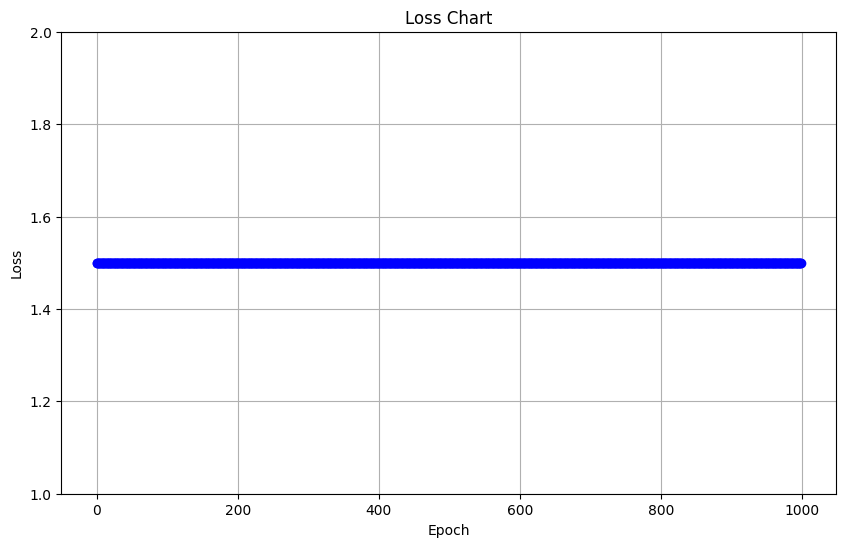

In [ ]:
# Plotting the loss chart to find out learning
plt.figure(figsize=(10, 6))
plt.plot(epoch_losses, marker='o', linestyle='-', color='blue')
plt.title('Loss Chart')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([1, 2])
plt.grid(True)
plt.show()

This loss curve looks bad; there is no curve. Basically network is not learning anything;

One possible suspect is the learning rate; If it is too large or too small; I adjusted that; It dit not help

The next could be the size of the network related to the training data; I adjusted that a bit and it helped very little;

Even while I was printing the first few activations (of a3) it was going from .9 to 1 in no time and staying there

### Visualizing Layer Activations - Activaions Saturaing problem


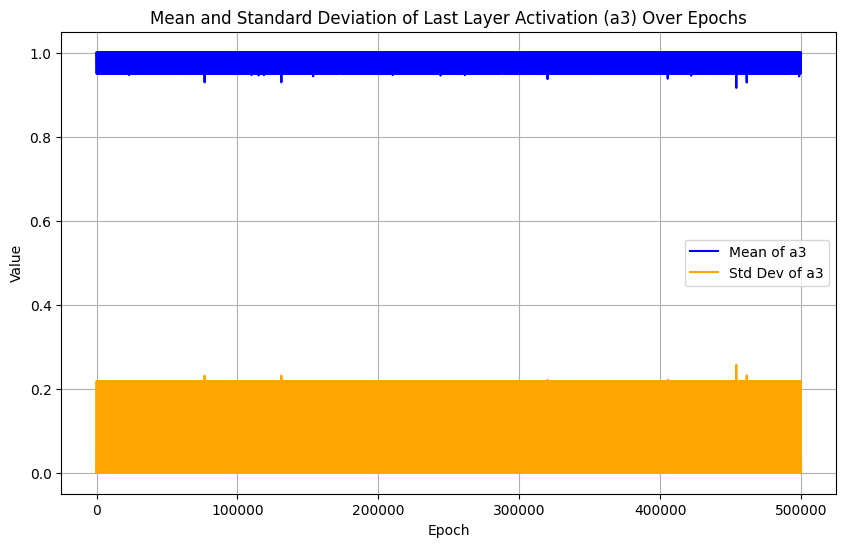

In [ ]:
# Let's plot the output of the last activation to see if we can get a hint on what is wrong

# Plotting the mean and standard deviation over epochs
plt.figure(figsize=(10, 6))

# Plot the mean values of a3
plt.plot(a3_means,  linestyle='-', color='blue', label='Mean of a3')

# Plot the standard deviation values of a3
plt.plot(a3_stddeviations,  linestyle='-', color='orange', label='Std Dev of a3')

# Adding titles and labels
plt.title('Mean and Standard Deviation of Last Layer Activation (a3) Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Value')

# Show grid and legend
plt.grid(True)
plt.legend()

We can see that our activations are directly going to 1 and staying there; that is it is saturating

### Preventing Activation Layer Saturation via Xavier/Glorot initialization of Weights
        
Our network is not learning anything; Loss is not decreasing and the output (a3) quickly saturates to near 1

I tried to reduce the dimensions of the weights as large networks with small inputs could saturate; That is not helping
I also tried decreasing the learning rate. that is also not helping\n",
This is where things like regularization, batch-normalisation, proper weight initialization etc could be needed; lets try those



Instead of random weights we will use this technique of weight intialization.

This follows the paper [Understanding the difficulty of training deep feedforward neural networks](https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf) by Xavier Glorot & Yoshua Bengio in 2010.

*Our objective here is to understand better why standard gradient descent from random initialization is doing so poorly with deep neural networks, to better understand these recent relative successes and help design better algorithms in the future. .... We find that the logistic sigmoid activation is unsuited for deep networks with random initialization because of its mean value, which can drive especially the top hidden layer into saturation*
...
Then the paper goes on this simple way to intialise weights

$$
W_{ij} \sim U\left(-\frac{1}{\sqrt{n}}, \frac{1}{\sqrt{n}}\right) \quad (1)
$$

where $U[−a, a]$ is the uniform distribution in the interval $(−a, a)$ and n is the size of the previous layer (the number of columns of W)

He further notes -
*For tanh networks, the proposed normalized initialization can be quite helpful, presumably because the layer-to-layer transformations maintain magnitudes of activations (flowing upward) and gradients (flowing backward).*

which is exactly what we are facing here

More details are here https://www.deeplearning.ai/ai-notes/initialization/index.html

In [ ]:
# adding what is called as the L2 regularization
lambda_reg = 0.01

# set learning rate  10e-6 was too low
learningRate = 10e-4

# Xavier/Glorot initialization for tanh activation functions
# for ReLu this will be Kaiming He intializtion
w1 = np.random.randn(1, 150) * np.sqrt(1. / 1)
w2 = np.random.randn(150, 50) * np.sqrt(1. / 150)
w3 = np.random.randn(50, 1) * np.sqrt(1. / 50)
# Here, np.sqrt(1. / n) is the standard deviation of the distribution used for initializing the weights,
#  with n being the number of input units to the layer.

# Activation to layer 0 is taken as input x
a0 = X
# Number of epochs
iterations = 1000

# Batch size
batch_size = 100
n_batches = X.shape[0] // batch_size # change the code slightly for batching through the inputs
epoch_losses = []
act_means = []
act_stddeviations =[]
y_means=[]

for iter in range(iterations):
    # Shuffle the data at the beginning of each epoch

    epoch_loss =0
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    Y_shuffled = Y[indices]

    for b in range(n_batches):
        # Slice out the batch
        start = b * batch_size
        end = start + batch_size
        a0 = X_shuffled[start:end]
        y_batch = Y_shuffled[start:end]

        # Forward pass
        z1 = np.dot(a0, w1)
        a1 = tanh(z1)
        z2 = np.dot(a1, w2)
        a2 = tanh(z2)
        z3 = np.dot(a2, w3)
        a3 = tanh(z3)

        # Calculate batch loss (MSE)
        batch_loss = np.mean((a3 - y_batch)**2)
        epoch_loss += batch_loss  # Accumulate batch loss

        if b == n_batches-1: # add at end of every batch
            # Calculate mean and standard deviation
            act_means.append((np.mean(a1),np.mean(a2),np.mean(a3)))
            act_stddeviations.append((np.std(a1),np.std(a2),np.std(a3)))
            y_means.append(np.mean(y_batch))


        # Backward Pass - Backpropagation

        # calculate the gradient for backpropagation
        #dC_da3 = (a3 - y_batch) # this is the derivative for Mean Square Error Loss (See Eq 1.3)
        # there we have simplified a bit (removed the multiplicaiton by 2); Here we need to divide by the batch size
        # MSE derivative by batch size
        dC_da3 = 2 * (a3 - y_batch) / batch_size  # The derivative of MSE with respect to the output

        if b // n_batches/2 == 0 and iter ==1 and iterations==1:#print only once
            print(f"---------------batch={b,n_batches}- iter={iter,iterations}---batch-loss={batch_loss}----")
            print("x",a0[1:5])
            print("y (expected)",y_batch[1:5])
            print("a3 (output)",a3[1:5])
            print("gradinnt",dC_da3[1:5])

        dC_dw3_t = dC_da3 * derv_tanh(z3)
        dC_dw3 = np.dot(a2.T, dC_dw3_t)

        dC_da2 = np.dot(dC_da3 * derv_tanh(z3), w3.T)
        dC_dw2_t = dC_da2 * derv_tanh(z2)
        dC_dw2 = np.dot(a1.T, dC_dw2_t)

        dC_da1 = np.dot(dC_da2 * derv_tanh(z2), w2.T)
        dC_dw1_t = dC_da1 * derv_tanh(z1)
        dC_dw1 = np.dot(a0.T, dC_dw1_t)

        # Update weights with L2 regularization
        # instead of w3 -= learningRate * dC_dw3
        # This term works to penalize large weights, effectively "shrinking" them during each update.
        # The strength of this penalty is controlled by the lambda_reg hyperparameter:
        # setting it too high can lead to underfitting (as the model becomes too simple),
        #  while setting it too low may lead to minimal regularization effect.
        w3 -= learningRate * (dC_dw3 + lambda_reg * w3)
        w2 -= learningRate * (dC_dw2 + lambda_reg * w2)
        w1 -= learningRate * (dC_dw1 + lambda_reg * w1)

    # Calculate the average loss for the epoch
    epoch_average_loss = epoch_loss / n_batches
    #print(f"Epoch loss Average={epoch_average_loss:.2f}")
    epoch_losses.append(epoch_average_loss)

print(f"---------------batch={b,n_batches}- iter={iter,iterations}------------------")
print("x",a0[1:5])
print("y (expected)",y_batch[1:5])
print("a3 (output)",a3[1:5])
print("gradinnt",dC_da3[1:5])

#---------------------------------------------------------------
# Training is done, weights are primed for output y
#---------------------------------------------------------------

---------------batch=(9, 10)- iter=(999, 1000)------------------
x [[ 1.151]
 [ 1.987]
 [ 0.314]
 [ 0.566]]
y (expected) [[ 0.913]
 [ 0.914]
 [ 0.309]
 [ 0.536]]
a3 (output) [[ 0.881]
 [ 0.724]
 [ 0.547]
 [ 0.778]]
gradinnt [[-0.001]
 [-0.004]
 [ 0.005]
 [ 0.005]]


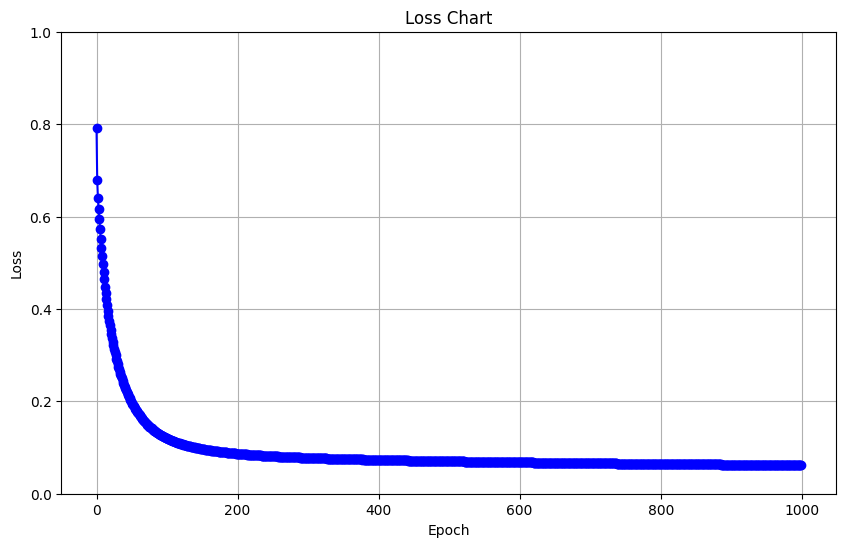

In [ ]:
# Plotting the loss chart
plt.figure(figsize=(10, 6))
plt.plot(epoch_losses, marker='o', linestyle='-', color='blue')
plt.title('Loss Chart')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.grid(True)
plt.show()


The loss has come down nicely; this hockey stick pattern is much better.

Since the loss is coming down slowly after the intial steep curve, that is a good charectestics that indicates learning rate is probably okay

But note that the loss is plateauing and not coming down or coming down extremely slowly.

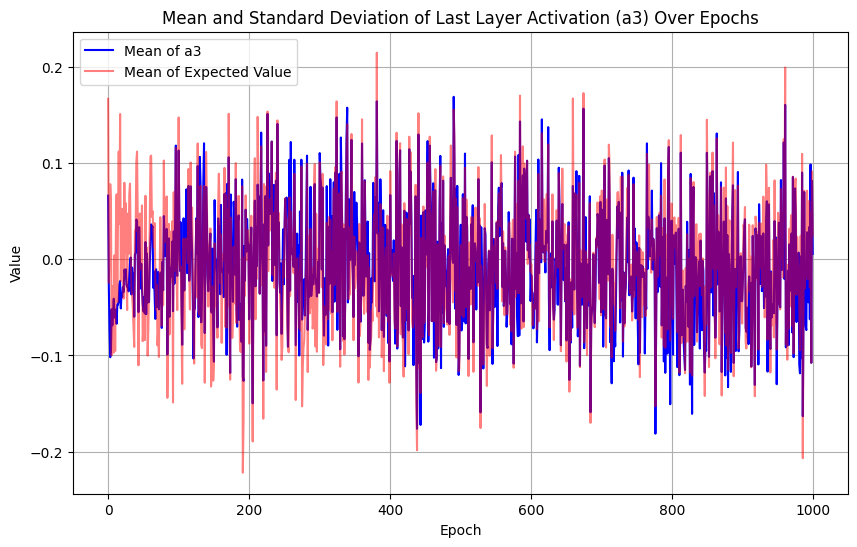

In [ ]:
# Let's plot the output of the last activation to see if we can get a hint on what is wrong
# Convert to numpy arrays for easier indexing
act_means = np.array(act_means)
act_stddeviations = np.array(act_stddeviations)

# Plotting the mean and standard deviation over epochs
plt.figure(figsize=(10, 6))

# Plot the mean values of a3
plt.plot(act_means[:,2],  linestyle='-', color='blue', label='Mean of a3')

# Plot the mean values of a3
plt.plot(y_means,  linestyle='-', color='red',alpha=.5, label='Mean of Expected Value')

# Plot the standard deviation values of a3
#plt.plot(act_stddeviations[:,2],  linestyle='-', color='orange', label='Std Dev of a3')

# Adding titles and labels
plt.title('Mean and Standard Deviation of Last Layer Activation (a3) Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Value')

# Show grid and legend
plt.grid(True)
plt.legend()

Note that the layer 3 which is the last layer should have a similar output like sine function, go between 0 and 1

In [ ]:
def forward(x):
    # Forward pass - Straight Forward
    z1= np.dot(x,w1)
    a1 = tanh(z1)
    z2= np.dot(a1,w2)
    a2 = tanh(z2)
    z3= np.dot(a2,w3)
    a3 = tanh(z3)
    return a3

test_angles =  [4.208,-3.208, 2.108,np.pi,0,1]

for angle in test_angles:
    x = (np.array([angle]).reshape(-1,1))
    print(f"Ouput after Training for angle {angle} is ",forward(x), "Expected is", np.sin(angle))



Ouput after Training for angle 4.208 is  [[-0.601]] Expected is -0.8754699268728889
Ouput after Training for angle -3.208 is  [[ 0.090]] Expected is 0.06635854848376267
Ouput after Training for angle 2.108 is  [[ 0.673]] Expected is 0.859143018339726
Ouput after Training for angle 3.141592653589793 is  [[-0.042]] Expected is 1.2246467991473532e-16
Ouput after Training for angle 0 is  [[ 0.000]] Expected is 0.0
Ouput after Training for angle 1 is  [[ 0.879]] Expected is 0.8414709848078965


Now  the results looks much better.

Intially the results were not too great. Then I increased the number of samples from 1000 to 10,000 in training data

Also note that the NW is not perfect still

In [ ]:

# this is failing, expected is close to zero; could be that there are very less training data for these values
angle = 2*np.pi
x = (np.array([angle]).reshape(-1,1))
print("Ouput after Training is ",forward(x), "Expected", np.sin(angle))


Ouput after Training is  [[-0.902]] Expected -2.4492935982947064e-16


### Visualising if the Neural Net has really approxiamted the Sine Funtion

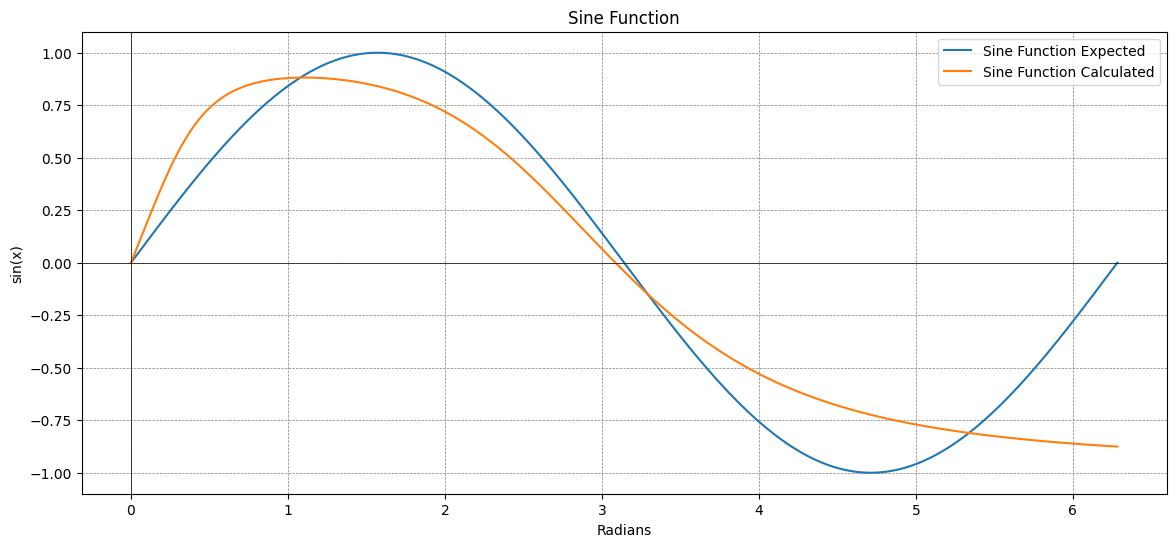

In [ ]:
# lets plot the angles generated by this nettwok and the ones calcuated by numpy.sine function

angles = np.linspace(0, 2*np.pi, n_points)
calculated_angles = [forward(x) for x in angles]
# Target outputs (reshape sine_values to match output shape of the network), also called validation data set
Y_nn = np.array(calculated_angles).reshape(-1, 1)

# Plotting the sine wave
plt.figure(figsize=(14, 6))
plt.plot(X, Y, label='Sine Function Expected')
plt.plot(X, Y_nn, label='Sine Function Calculated' )

# Customizing the plot
plt.title('Sine Function')
plt.xlabel('Radians')
plt.ylabel('sin(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()



Lets see if we can improve the results

1. Standerdising the weights
    Since inputs are angle between -2.pi and +2/pi, it is centered around zero and that should be fine
    We could standerdising the angles Y
    YN= (Y - np.mean(Y)) / np.std(Y)
    However this gave worse result
2. Drop Out ?
3. Layer Normalisation
4. Bigger Network - Here have tried to increase the neurons in each layers; this helps to some extend

Let's try layer normalization and see if that is going to help drastically



### Checking for underfitting or overfitting via Validation dataset

In [ ]:
# This is the training data for the Sine function; Since the value is know it is easy to generate it
# If you need to approximate any other deistribution and then predict from it, you can see sources like Kaggle data set for training and validation data
from sklearn.model_selection import train_test_split

# Number of data points
n_points = 10000

# Generate input values (angles) - let's use one full period 0 to 2pi
angles = np.linspace(0, 2*np.pi, n_points)

# Calculate sine values
sine_values = np.sin(angles)

print(max(sine_values),min(sine_values))
# Prepare inputs for the network
# Assuming we vary the first input and keep the others as some pattern or constant
X = angles.reshape(-1,1)


# Target outputs (reshape sine_values to match output shape of the network), also called validation data set
Y = sine_values.reshape(-1, 1)  # Shape will be (n_points, 1)


# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)


0.9999999876605268 -0.9999999876605268


In [ ]:
print(len(X_train))
print(len(X_val))

8000
2000


In [ ]:
# adding what is called as the L2 regularization
lambda_reg = 0.01

# set learning rate  10e-6 was too low
learningRate = 10e-3

# Xavier/Glorot initialization for tanh activation functions
# for ReLu this will be Kaiming He intializtion
w1 = np.random.randn(1, 150) * np.sqrt(1. / 1)
w2 = np.random.randn(150, 50) * np.sqrt(1. / 150)
w3 = np.random.randn(50, 1) * np.sqrt(1. / 50)
# Here, np.sqrt(1. / n) is the standard deviation of the distribution used for initializing the weights,
#  with n being the number of input units to the layer.

# Activation to layer 0 is taken as input x
a0 = X_train
# Number of epochs
iterations = 1000

# Batch size
batch_size = 10
n_batches = X_train.shape[0] // batch_size # change the code slightly for batching through the inputs
train_losses = []
val_losses = []

for iter in range(iterations):
    # Shuffle the data at the beginning of each epoch

    epoch_loss =0
    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X_train[indices]
    Y_shuffled = Y_train[indices]

    for b in range(n_batches):
        # Slice out the batch
        start = b * batch_size
        end = start + batch_size
        a0 = X_shuffled[start:end]
        y_batch = Y_shuffled[start:end]

        # Forward pass
        z1 = np.dot(a0, w1)
        a1 = tanh(z1)
        z2 = np.dot(a1, w2)
        a2 = tanh(z2)
        z3 = np.dot(a2, w3)
        a3 = tanh(z3)

        # Calculate batch loss (MSE)
        batch_loss = np.mean((a3 - y_batch)**2)
        epoch_loss += batch_loss  # Accumulate batch loss

        if b == n_batches-1: # add at end of every batch
            # Calculate mean and standard deviation
            act_means.append((np.mean(a1),np.mean(a2),np.mean(a3)))
            act_stddeviations.append((np.std(a1),np.std(a2),np.std(a3)))
            y_means.append(np.mean(y_batch))


        # Backward Pass - Backpropagation

        # calculate the gradient for backpropagation
        #dC_da3 = (a3 - y_batch) # this is the derivative for Mean Square Error Loss (See Eq 1.3)
        # there we have simplified a bit (removed the multiplicaiton by 2); Here we need to divide by the batch size
        # MSE derivative by batch size
        dC_da3 = 2 * (a3 - y_batch) / batch_size  # The derivative of MSE with respect to the output

        if b // n_batches/2 == 0 and iter ==1 and iterations==1:#print only once
            print(f"---------------batch={b,n_batches}- iter={iter,iterations}---batch-loss={batch_loss}----")
            print("x",a0[1:5])
            print("y (expected)",y_batch[1:5])
            print("a3 (output)",a3[1:5])
            print("gradinnt",dC_da3[1:5])

        dC_dw3_t = dC_da3 * derv_tanh(z3)
        dC_dw3 = np.dot(a2.T, dC_dw3_t)

        dC_da2 = np.dot(dC_da3 * derv_tanh(z3), w3.T)
        dC_dw2_t = dC_da2 * derv_tanh(z2)
        dC_dw2 = np.dot(a1.T, dC_dw2_t)

        dC_da1 = np.dot(dC_da2 * derv_tanh(z2), w2.T)
        dC_dw1_t = dC_da1 * derv_tanh(z1)
        dC_dw1 = np.dot(a0.T, dC_dw1_t)

        # Update weights with L2 regularization
        # instead of w3 -= learningRate * dC_dw3
        # This term works to penalize large weights, effectively "shrinking" them during each update.
        # The strength of this penalty is controlled by the lambda_reg hyperparameter:
        # setting it too high can lead to underfitting (as the model becomes too simple),
        #  while setting it too low may lead to minimal regularization effect.
        w3 -= learningRate * (dC_dw3 + lambda_reg * w3)
        w2 -= learningRate * (dC_dw2 + lambda_reg * w2)
        w1 -= learningRate * (dC_dw1 + lambda_reg * w1)

    # Calculate the average loss for the epoch
    epoch_average_loss = epoch_loss / n_batches
    #print(f"Epoch loss Average={epoch_average_loss:.2f}")
    train_losses.append(epoch_average_loss)
    # At the end of each epoch, after training on the training set, evaluate on the validation set
    val_loss = 0
    for i in range(0, len(X_val), batch_size):
        # Prepare the batch from the validation set
        start = i
        end = i + batch_size
        a0_val = X_val[start:end]
        y_val_batch = Y_val[start:end]

        # Forward pass on the validation set (no backpropagation)
        z1_val = np.dot(a0_val, w1)
        a1_val = tanh(z1_val)
        z2_val = np.dot(a1_val, w2)
        a2_val = tanh(z2_val)
        z3_val = np.dot(a2_val, w3)
        a3_val = tanh(z3_val)

        # Calculate validation loss (MSE)
        val_batch_loss = np.mean((a3_val - y_val_batch)**2)
        val_loss += val_batch_loss

    # Calculate the average validation loss
    val_average_loss = val_loss / (len(X_val) / batch_size)
    val_losses.append(val_average_loss)


#---------------------------------------------------------------
# Training is done, weights are primed for output y
#---------------------------------------------------------------



Lets plot the training and validation Loss.

We can see that there is not much deviation between.

So the network is neither underfitting nor overfitting. So that does not seem to be the problem.

More on this here in the DeepLearning Book https://www.deeplearningbook.org/contents/ml.html

![overandunderfitting](https://i.postimg.cc/wjH4nqgQ/Screenshot-from-2024-02-23-17-28-09.png)

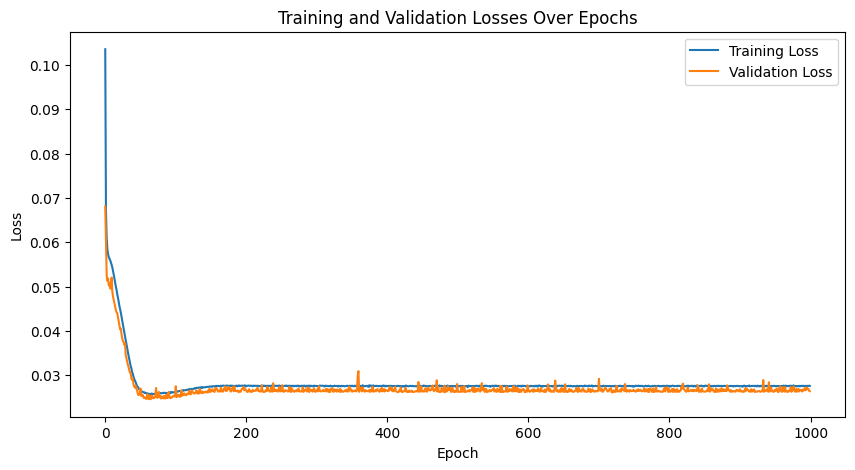

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Losses Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

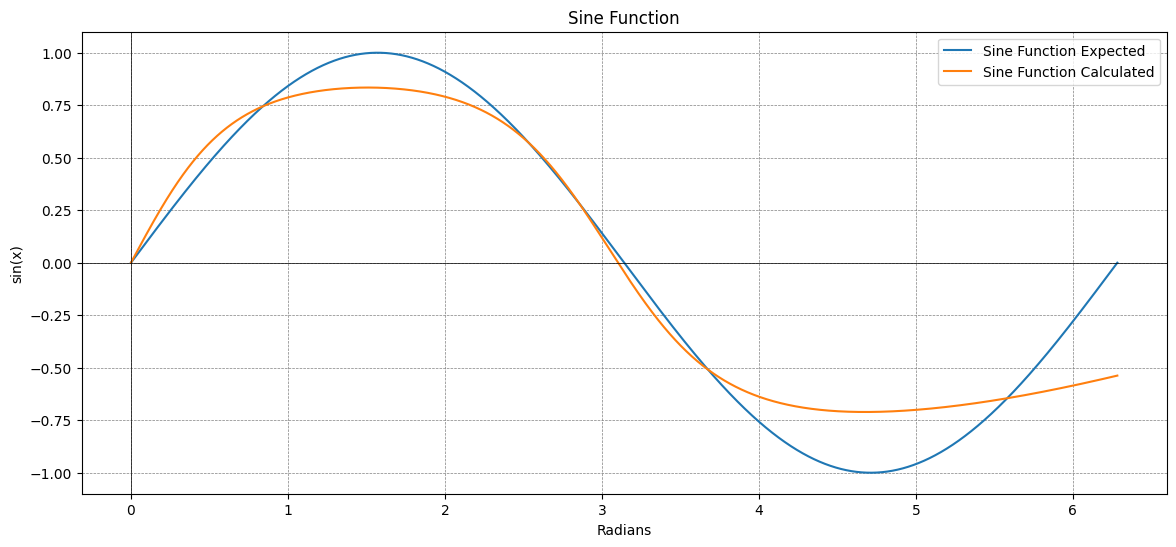

In [ ]:
def forward(x):
    # Forward pass - Straight Forward
    z1= np.dot(x,w1)
    a1 = tanh(z1)
    z2= np.dot(a1,w2)
    a2 = tanh(z2)
    z3= np.dot(a2,w3)
    a3 = tanh(z3)
    return a3

# lets plot the angles generated by this nettwok and the ones calcuated by numpy.sine function

angles = np.linspace(0, 2*np.pi, n_points)
calculated_angles = [forward(x) for x in angles]
# Target outputs (reshape sine_values to match output shape of the network), also called validation data set
Y_nn = np.array(calculated_angles).reshape(-1, 1)

# Plotting the sine wave
plt.figure(figsize=(14, 6))
plt.plot(X, Y, label='Sine Function Expected')
plt.plot(X, Y_nn, label='Sine Function Calculated' )

# Customizing the plot
plt.title('Sine Function')
plt.xlabel('Radians')
plt.ylabel('sin(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()


This is getting better. Basically reducing the batch size alone seems to have helped fit more precisely.

However looking at tha training loss steeply decreasing and then plateauing would give us an idea on having a more adataptive learning rate

Lets try that

In [ ]:
# adding what is called as the L2 regularization
lambda_reg = 0.01

# set learning rate  10e-6 was too low
learningRate = 10e-3

# Adam optimizer parameters
alpha = 10e-3  # learning rate
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Initialize first and second moments vectors
m1_w1, m1_w2, m1_w3 = 0, 0, 0
v1_w1, v1_w2, v1_w3 = 0, 0, 0


# Xavier/Glorot initialization for tanh activation functions
# for ReLu this will be Kaiming He intializtion
w1 = np.random.randn(1, 150) * np.sqrt(1. / 1)
w2 = np.random.randn(150, 50) * np.sqrt(1. / 150)
w3 = np.random.randn(50, 1) * np.sqrt(1. / 50)
# Here, np.sqrt(1. / n) is the standard deviation of the distribution used for initializing the weights,
#  with n being the number of input units to the layer.

# Activation to layer 0 is taken as input x
a0 = X_train
# Number of epochs
iterations = 100

# Batch size
batch_size = 10
n_batches = X_train.shape[0] // batch_size # change the code slightly for batching through the inputs
train_losses = []
val_losses = []

for iter in range(iterations):
    # Shuffle the data at the beginning of each epoch

    epoch_loss =0
    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X_train[indices]
    Y_shuffled = Y_train[indices]

    for b in range(n_batches):
        # Slice out the batch
        start = b * batch_size
        end = start + batch_size
        a0 = X_shuffled[start:end]
        y_batch = Y_shuffled[start:end]

        # Forward pass
        z1 = np.dot(a0, w1)
        a1 = tanh(z1)
        z2 = np.dot(a1, w2)
        a2 = tanh(z2)
        z3 = np.dot(a2, w3)
        a3 = tanh(z3)

        # Calculate batch loss (MSE)
        batch_loss = np.mean((a3 - y_batch)**2)
        epoch_loss += batch_loss  # Accumulate batch loss

        if b == n_batches-1: # add at end of every batch
            # Calculate mean and standard deviation
            act_means.append((np.mean(a1),np.mean(a2),np.mean(a3)))
            act_stddeviations.append((np.std(a1),np.std(a2),np.std(a3)))
            y_means.append(np.mean(y_batch))


        # Backward Pass - Backpropagation

        # calculate the gradient for backpropagation
        #dC_da3 = (a3 - y_batch) # this is the derivative for Mean Square Error Loss (See Eq 1.3)
        # there we have simplified a bit (removed the multiplicaiton by 2); Here we need to divide by the batch size
        # MSE derivative by batch size
        dC_da3 = 2 * (a3 - y_batch) / batch_size  # The derivative of MSE with respect to the output

        if b // n_batches/2 == 0 and iter ==1 and iterations==1:#print only once
            print(f"---------------batch={b,n_batches}- iter={iter,iterations}---batch-loss={batch_loss}----")
            print("x",a0[1:5])
            print("y (expected)",y_batch[1:5])
            print("a3 (output)",a3[1:5])
            print("gradinnt",dC_da3[1:5])

        dC_dw3_t = dC_da3 * derv_tanh(z3)
        dC_dw3 = np.dot(a2.T, dC_dw3_t)

        dC_da2 = np.dot(dC_da3 * derv_tanh(z3), w3.T)
        dC_dw2_t = dC_da2 * derv_tanh(z2)
        dC_dw2 = np.dot(a1.T, dC_dw2_t)

        dC_da1 = np.dot(dC_da2 * derv_tanh(z2), w2.T)
        dC_dw1_t = dC_da1 * derv_tanh(z1)
        dC_dw1 = np.dot(a0.T, dC_dw1_t)


        # Updating Adam paramters
        #Update the moments for each set of weights
        m1_w1 = beta1 * m1_w1 + (1 - beta1) * dC_dw1
        v1_w1 = beta2 * v1_w1 + (1 - beta2) * (dC_dw1 ** 2)

        m1_w2 = beta1 * m1_w2 + (1 - beta1) * dC_dw2
        v1_w2 = beta2 * v1_w2 + (1 - beta2) * (dC_dw2 ** 2)

        m1_w3 = beta1 * m1_w3 + (1 - beta1) * dC_dw3
        v1_w3 = beta2 * v1_w3 + (1 - beta2) * (dC_dw3 ** 2)

        # Compute bias-corrected moments
        m1_hat_w1 = m1_w1 / (1 - beta1**(iter + 1))
        v1_hat_w1 = v1_w1 / (1 - beta2**(iter + 1))

        m1_hat_w2 = m1_w2 / (1 - beta1**(iter + 1))
        v1_hat_w2 = v1_w2 / (1 - beta2**(iter + 1))

        m1_hat_w3 = m1_w3 / (1 - beta1**(iter + 1))
        v1_hat_w3 = v1_w3 / (1 - beta2**(iter + 1))

        # Update weights with Adam optimization
        w1 -= alpha * (m1_hat_w1 / (np.sqrt(v1_hat_w1) + epsilon) + lambda_reg * w1)
        w2 -= alpha * (m1_hat_w2 / (np.sqrt(v1_hat_w2) + epsilon) + lambda_reg * w2)
        w3 -= alpha * (m1_hat_w3 / (np.sqrt(v1_hat_w3) + epsilon) + lambda_reg * w3)

    # Calculate the average loss for the epoch
    epoch_average_loss = epoch_loss / n_batches
    #print(f"Epoch loss Average={epoch_average_loss:.2f}")
    train_losses.append(epoch_average_loss)
    # At the end of each epoch, after training on the training set, evaluate on the validation set
    val_loss = 0
    for i in range(0, len(X_val), batch_size):
        # Prepare the batch from the validation set
        start = i
        end = i + batch_size
        a0_val = X_val[start:end]
        y_val_batch = Y_val[start:end]

        # Forward pass on the validation set (no backpropagation)
        z1_val = np.dot(a0_val, w1)
        a1_val = tanh(z1_val)
        z2_val = np.dot(a1_val, w2)
        a2_val = tanh(z2_val)
        z3_val = np.dot(a2_val, w3)
        a3_val = tanh(z3_val)

        # Calculate validation loss (MSE)
        val_batch_loss = np.mean((a3_val - y_val_batch)**2)
        val_loss += val_batch_loss

    # Calculate the average validation loss
    val_average_loss = val_loss / (len(X_val) / batch_size)
    val_losses.append(val_average_loss)


#---------------------------------------------------------------
# Training is done, weights are primed for output y
#---------------------------------------------------------------



Lets Plot the Train and Validation Loss and check

We see a marked change now from previous charts. The main thing is that the training loss has grown very low now and reaching 0;

The validation loss is jumping around a bit.

Could this mean that the model is overfitting the training data. In this case it seems more likely that the validation dataset may be too small and hence causing the difference. This could be investigated further

If you find that the loss increases after some eppchs it could be that we could do early stopping of the training as well.

I gave the below chart to ChatGPT4 and asked its recommendataion. Here is what it came with

*If the L2 regularization is set appropriately, it should help prevent overfitting by penalizing large weights. However, the observed variability in the validation loss suggests reviewing the regularization strength or considering other forms of regularization like dropout, especially if overfitting is a concern.*

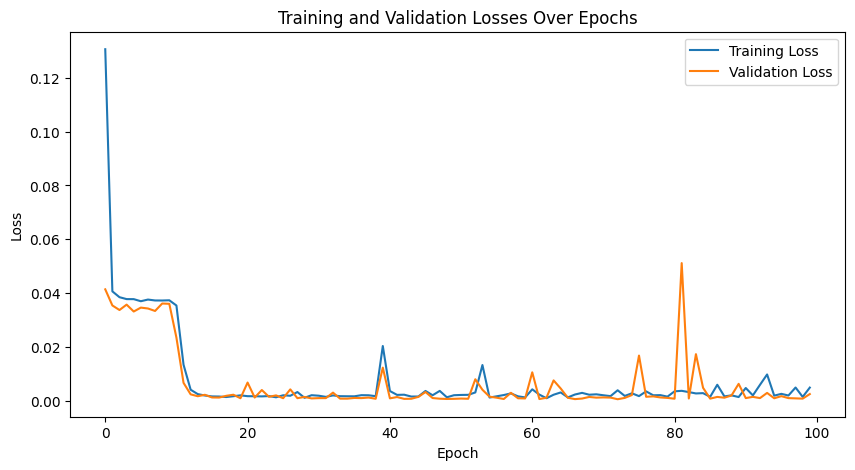

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Losses Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting again the expected and the generated values, we can see that this simple Neural Network has effectiverly approxiamted the sine function

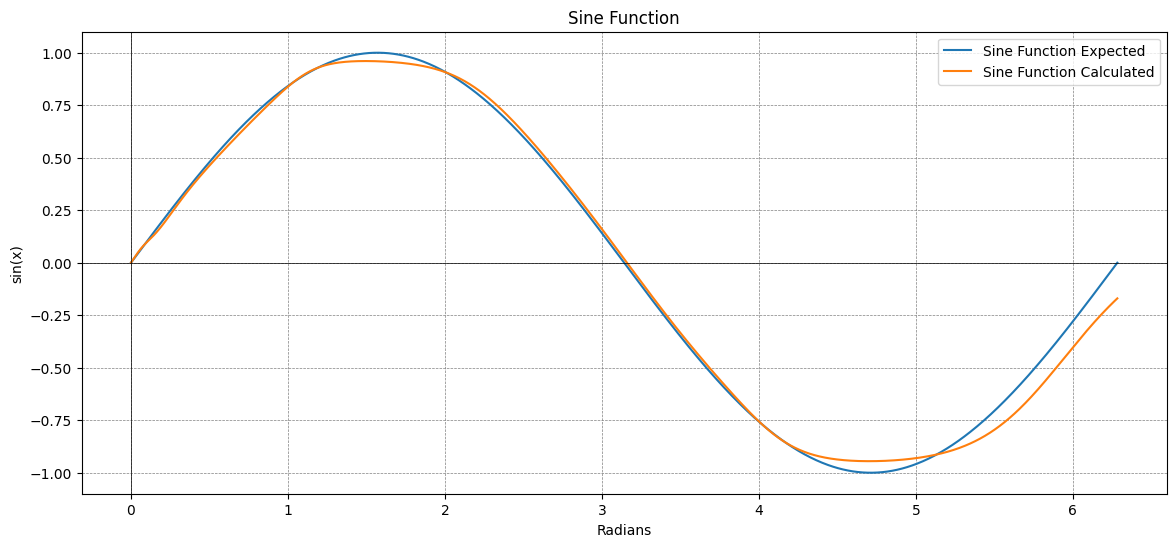

In [ ]:
def forward(x):
    # Forward pass - Straight Forward
    z1= np.dot(x,w1)
    a1 = tanh(z1)
    z2= np.dot(a1,w2)
    a2 = tanh(z2)
    z3= np.dot(a2,w3)
    a3 = tanh(z3)
    return a3

# lets plot the angles generated by this nettwok and the ones calcuated by numpy.sine function

angles = np.linspace(0, 2*np.pi, n_points)
calculated_angles = [forward(x) for x in angles]
# Target outputs (reshape sine_values to match output shape of the network), also called validation data set
Y_nn = np.array(calculated_angles).reshape(-1, 1)

# Plotting the sine wave
plt.figure(figsize=(14, 6))
plt.plot(X, Y, label='Sine Function Expected')
plt.plot(X, Y_nn, label='Sine Function Calculated' )

# Customizing the plot
plt.title('Sine Function')
plt.xlabel('Radians')
plt.ylabel('sin(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()